In [1]:
# !pip install h2o

In [2]:
import pandas as pd
import h2o
from torch import nn
from sklearn.datasets import make_circles

# **PyTorch**

In [3]:
class MyPyTorchNet(nn.Module):
    def __init__(self, input_channel, output_neurons, kernel_size):
        super(MyPyTorchNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channel, 6, kernel_size)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_neurons)

def forward(self, x):
    x = nn.functional.max_pool2d(nn.functional.relu(self.conv1(x)), (2, 2))
    x =  nn.functional.max_pool2d(nn.functional.relu(self.cov2(x)), 2)
    x = nn.functional.view(-1, self.num_flat_features(x))
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    return x

def num_flat_features(self, x):
    num_features = 1
    for s in x.size()[1:]:
        num_features *= s
    return num_features

In [4]:
pytorch_net = MyPyTorchNet(1, 10, 5)
print(pytorch_net)

MyPyTorchNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# **AutoML With H2O**

In [5]:
X, Y = make_circles(n_samples = 1000, noise = 0.2, factor = 0.5, random_state = 9)
circle_df = pd.DataFrame(X, columns = ['X1', 'X2'])
circle_df['Y'] = Y
print(circle_df.head())
# circle_df.to_csv('Circles (AutoML With H2O).csv', index = False, header = True)

         X1        X2  Y
0  0.802318 -0.005685  0
1 -0.220035 -0.537809  1
2  0.952239  0.731662  0
3  0.624262 -0.047466  0
4 -0.283659  0.319785  1


In [6]:
h2o.init()
class_df = h2o.import_file('Data/Circles (AutoML With H2O).csv', destination_frame = 'circle_df')
training_df, validation_df, test_df = class_df.split_frame(ratios = [0.6, 0.2], seed = 133)

h2o_automl = h2o.automl.H2OAutoML(max_models = 10, max_runtime_secs = 100, seed = 2)
h2o_automl.train(training_frame = training_df, validation_frame = validation_df, y = 'Y', x = ['X1', 'X2'])

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo7t5ue1t
  JVM stdout: /tmp/tmpo7t5ue1t/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo7t5ue1t/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_a7dzyd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:45:00.213: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:45:00.457: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████████████
04:45:22.376: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
04:45:23.831: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a bin

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),0/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [7]:
automl_leaderboard = h2o_automl.leaderboard
print(automl_leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230929_44500     0.322014  0.103693  0.220746  0.227655                  0.103693
StackedEnsemble_BestOfFamily_1_AutoML_1_20230929_44500  0.3246    0.105365  0.222473  0.22936                   0.105365
XRT_1_AutoML_1_20230929_44500                           0.330499  0.109229  0.194151  0.231679                  0.109229
DRF_1_AutoML_1_20230929_44500                           0.330753  0.109398  0.188997  0.231818                  0.109398
GBM_2_AutoML_1_20230929_44500                           0.341369  0.116533  0.276039  0.250359                  0.116533
GBM_3_AutoML_1_20230929_44500                           0.345511  0.119378  0.280735  0.252643                  0.119378
GBM_4_AutoML_1_20230929_44500                           0.347575  0.120808  0.281175  0.253865                  0.120808
XGBoost_1_AutoML_1_20230929_4450

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

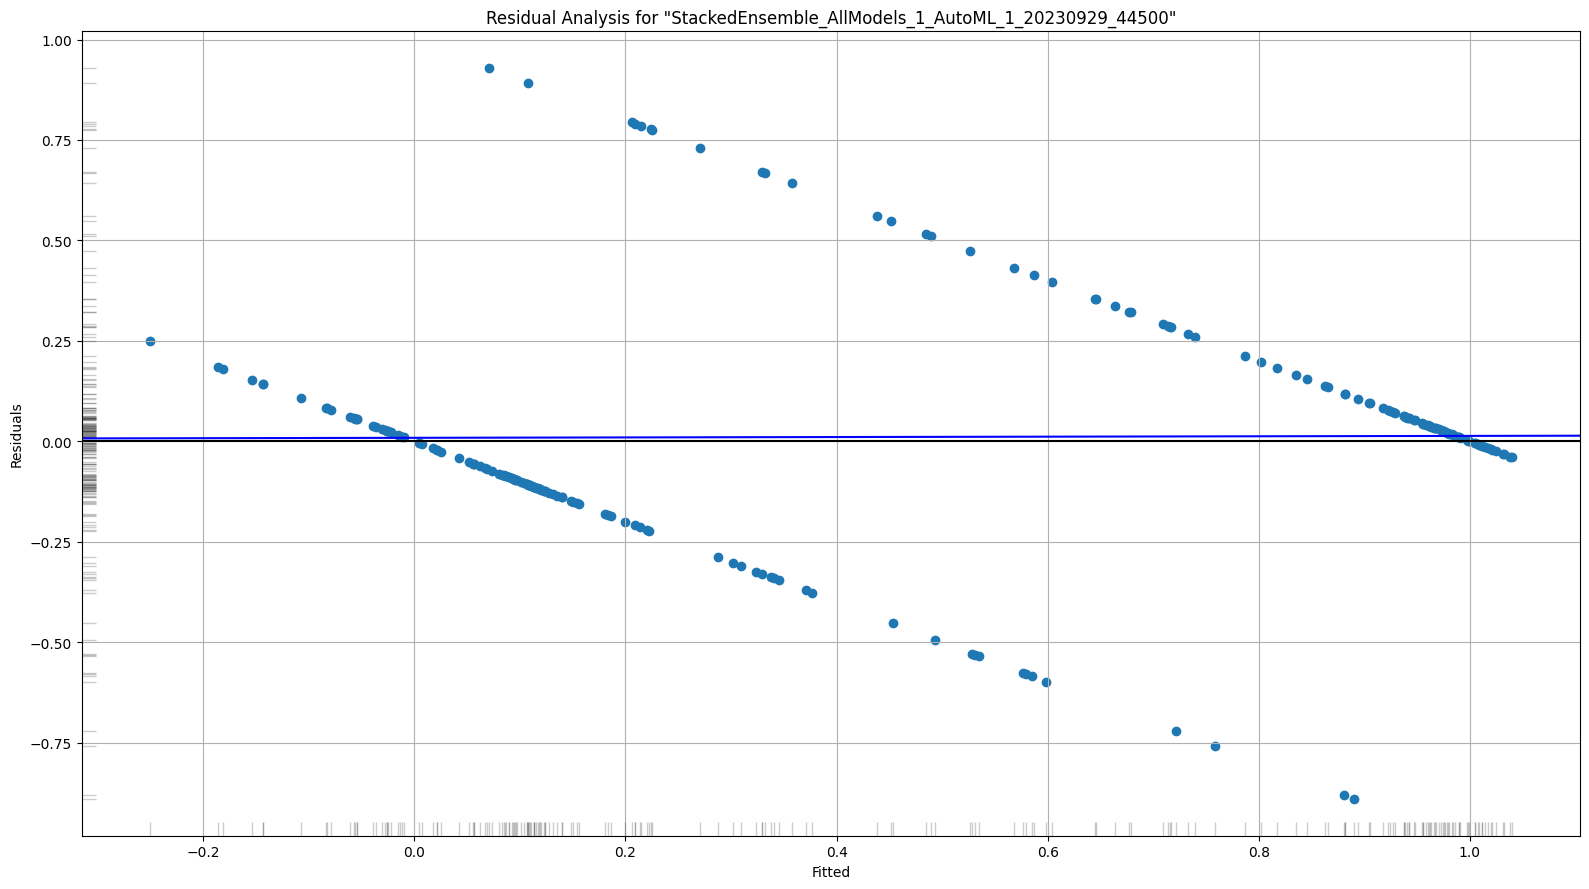

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

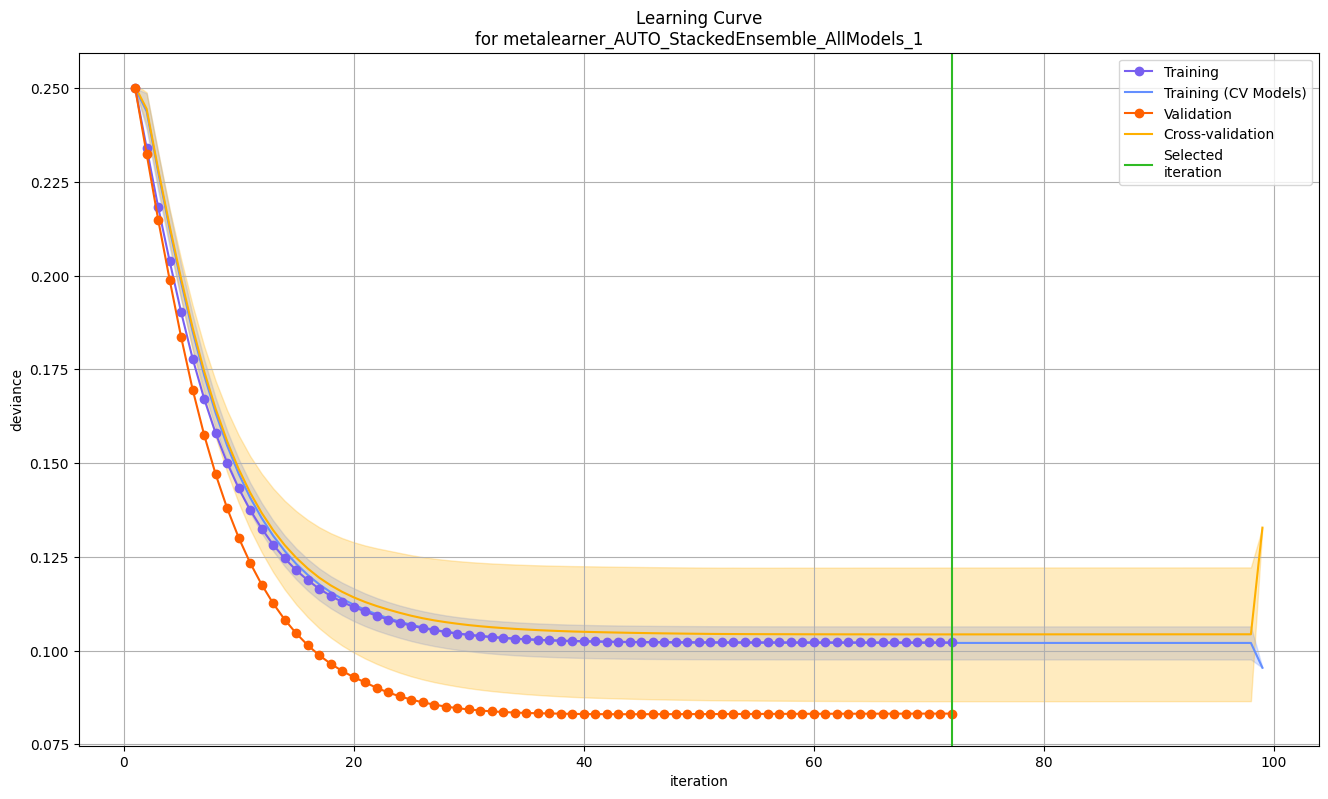

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

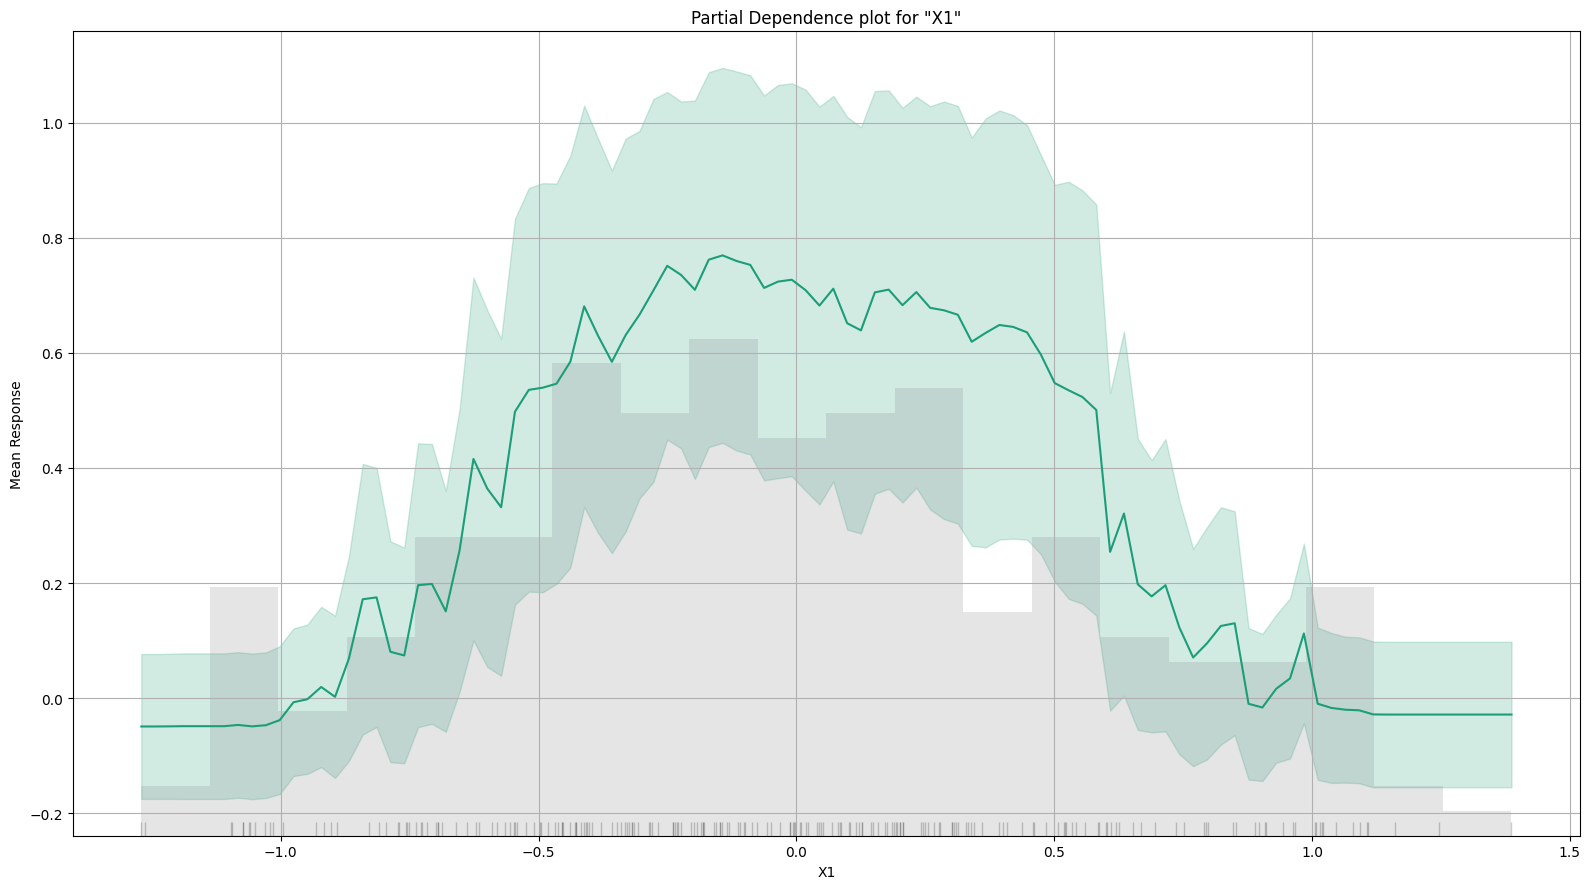

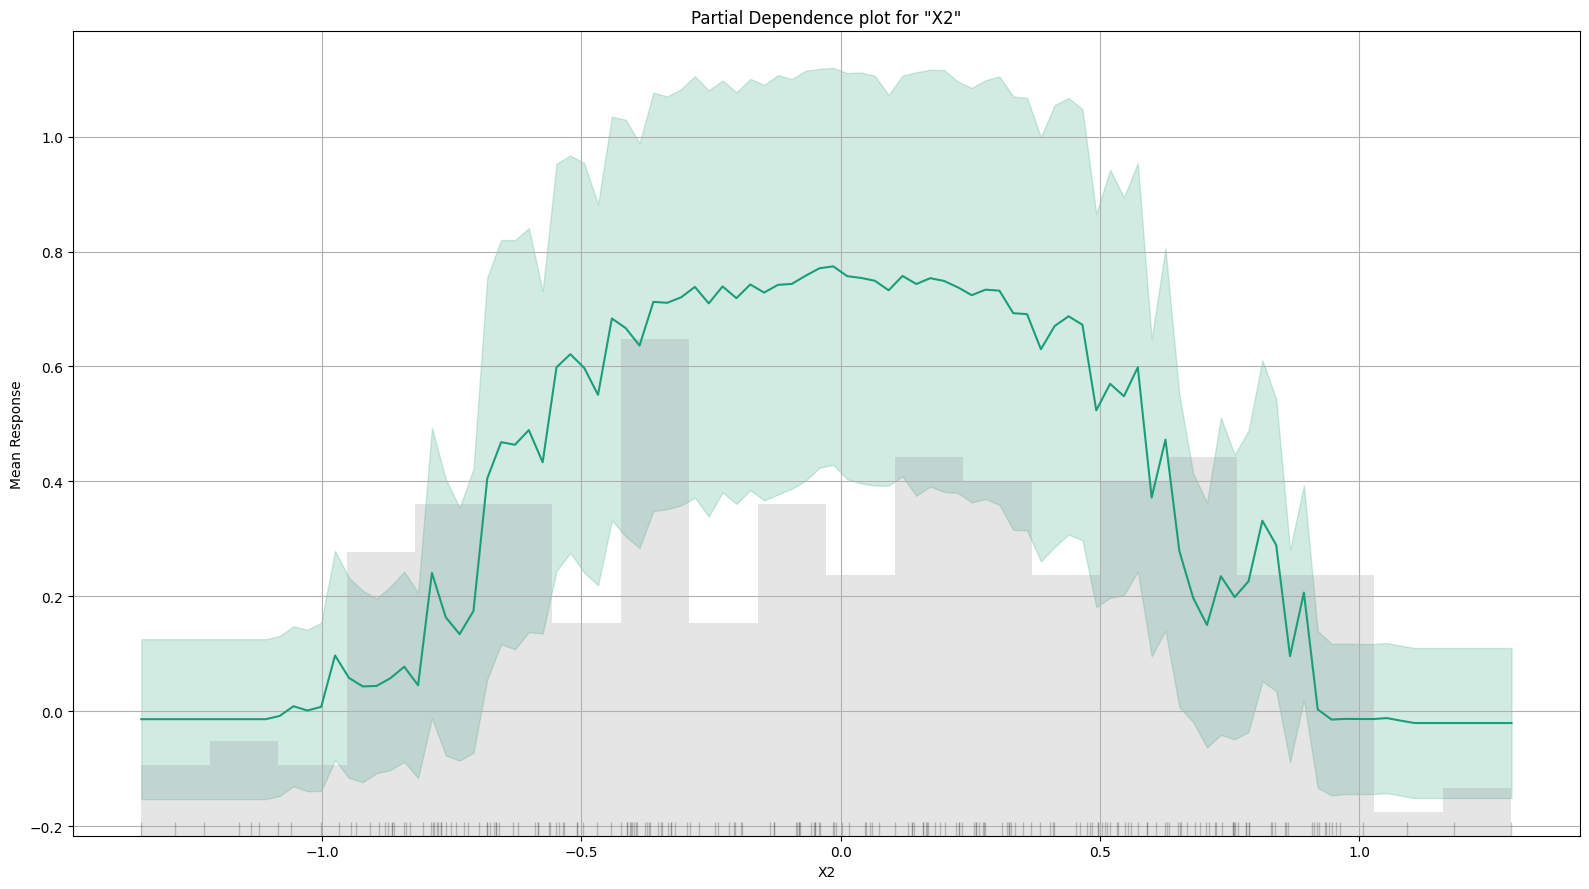

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

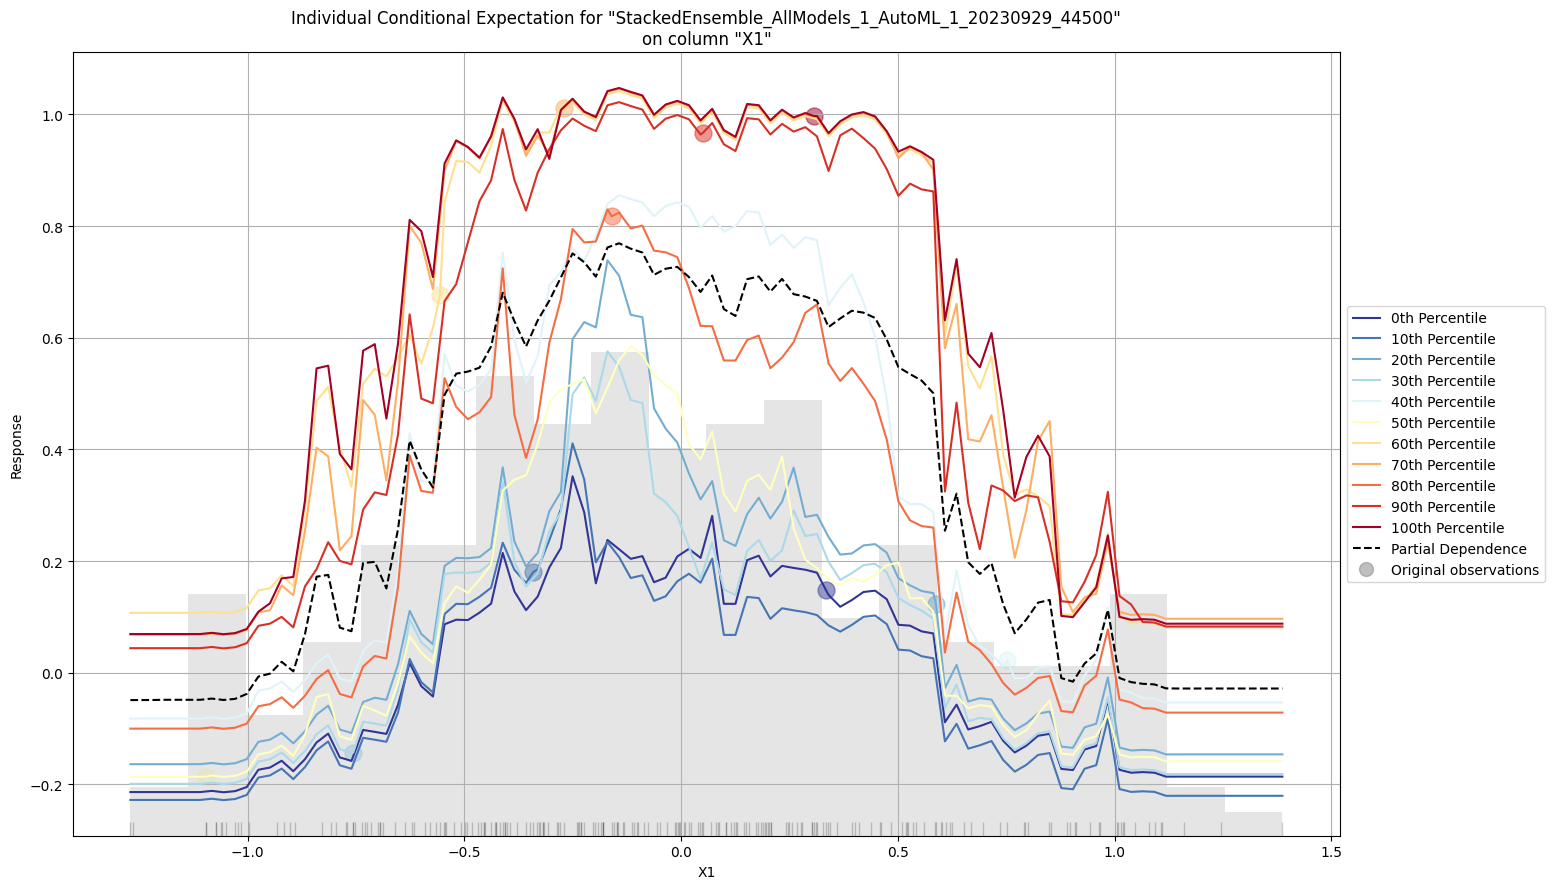

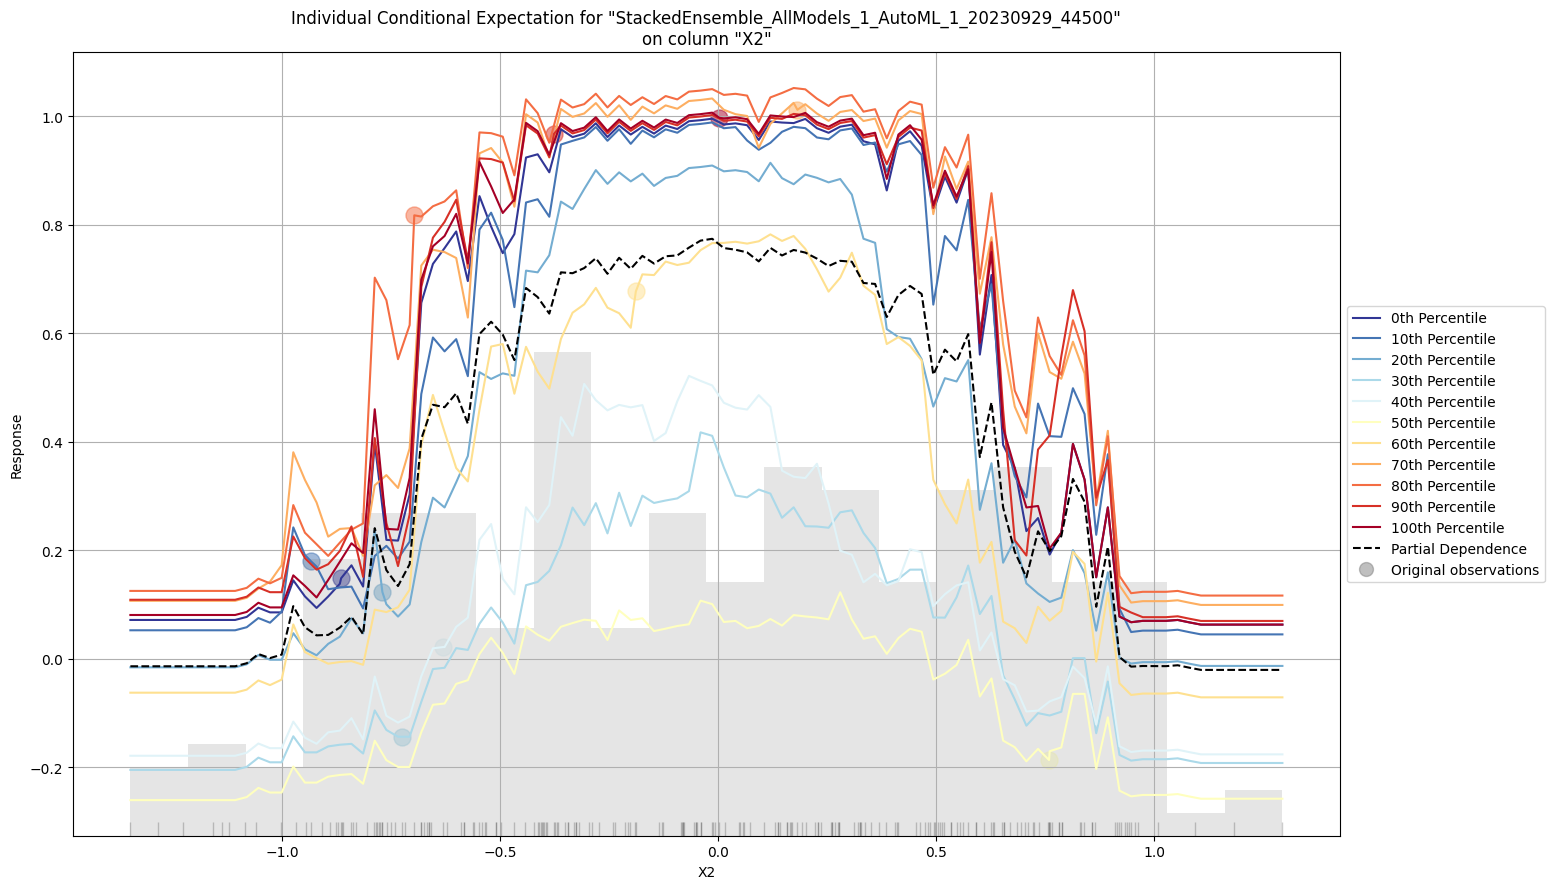

In [8]:
automl_leader_explainer = h2o_automl.leader.explain(test_df)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230929_44500,0.28677,0.0822368,0.186344,0.202694,0.0822368,1221,0.051125,StackedEnsemble
DRF_1_AutoML_1_20230929_44500,0.287113,0.0824336,0.155742,0.199327,0.0824336,141,0.0112,DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20230929_44500,0.289384,0.0837432,0.192483,0.203932,0.0837432,1342,0.065668,StackedEnsemble
XRT_1_AutoML_1_20230929_44500,0.298266,0.0889626,0.168225,0.209769,0.0889626,167,0.015083,DRF
GBM_2_AutoML_1_20230929_44500,0.319133,0.101846,0.252012,0.242051,0.101846,284,0.045647,GBM
GBM_3_AutoML_1_20230929_44500,0.324092,0.105036,0.257189,0.241109,0.105036,478,0.042606,GBM
GBM_4_AutoML_1_20230929_44500,0.329187,0.108364,0.260245,0.246527,0.108364,194,0.022103,GBM
XGBoost_3_AutoML_1_20230929_44500,0.334983,0.112214,0.245896,0.280423,0.112214,825,0.008737,XGBoost
GBM_1_AutoML_1_20230929_44500,0.339519,0.115273,0.288344,0.249581,0.115273,403,0.015555,GBM
XGBoost_1_AutoML_1_20230929_44500,0.341689,0.116751,0.265501,0.266175,0.116751,8198,0.006684,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

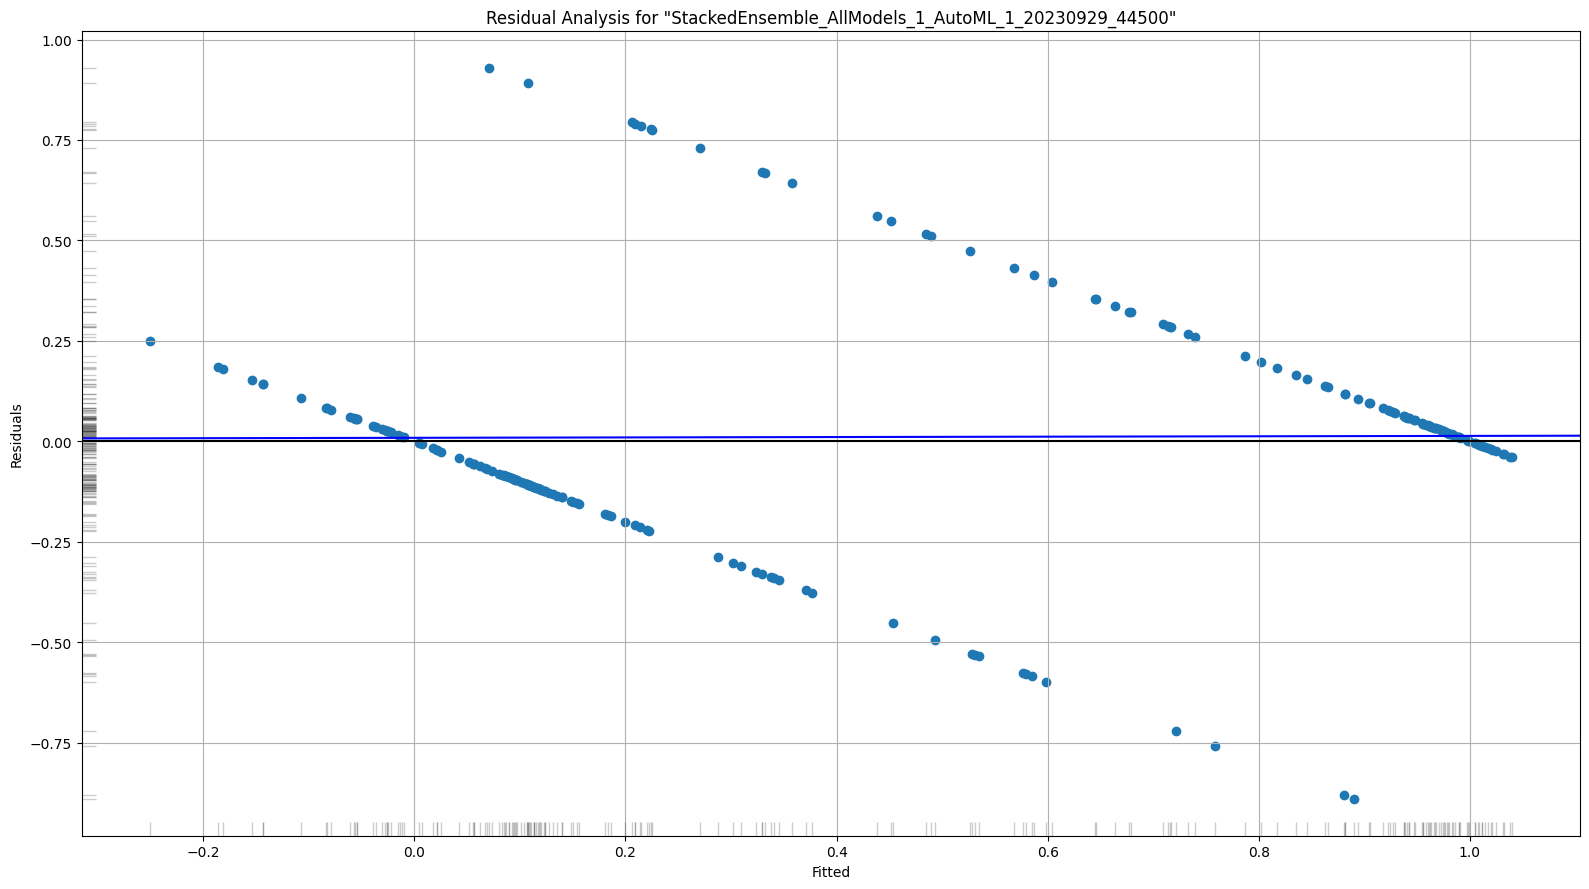

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

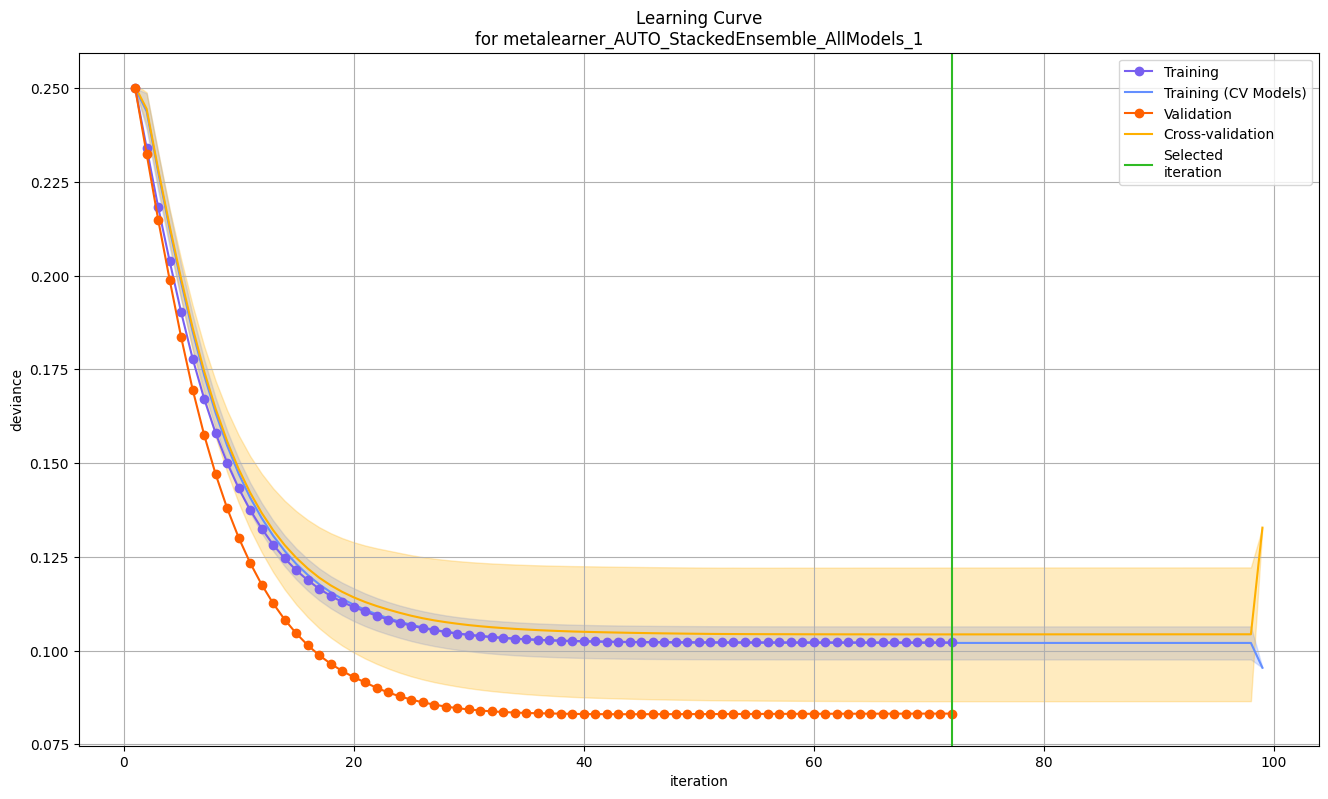

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

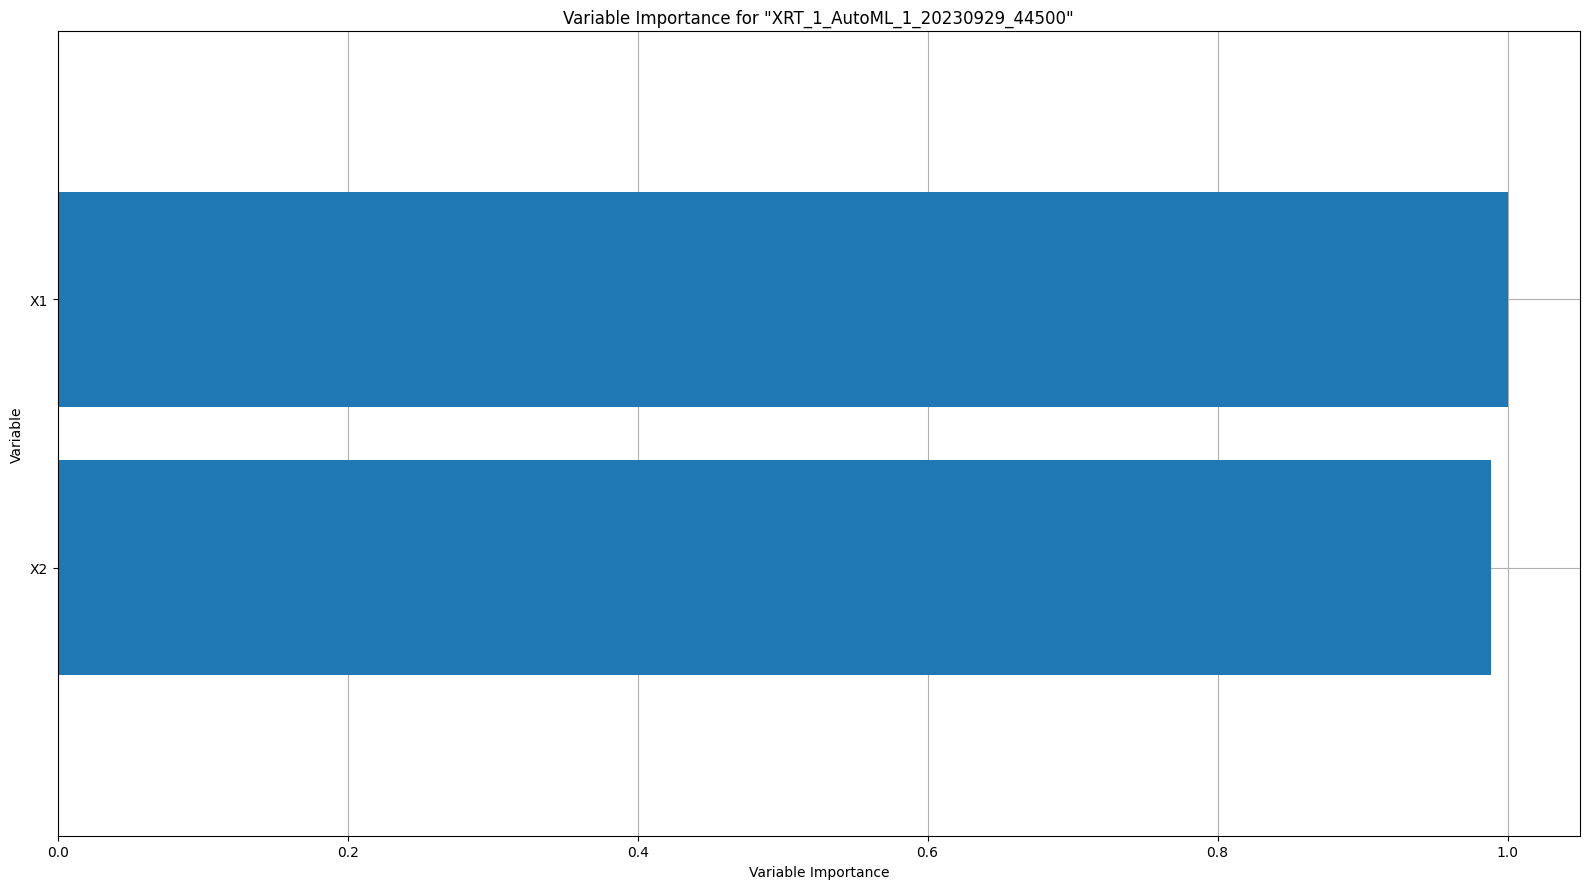

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

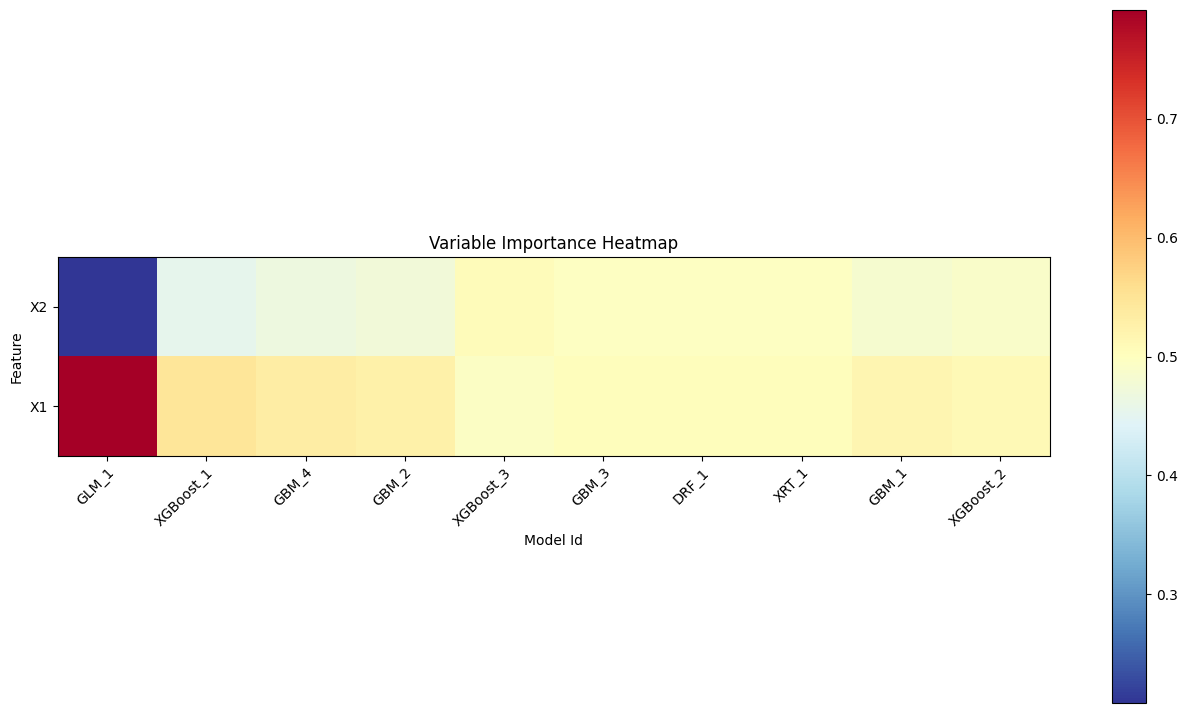

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

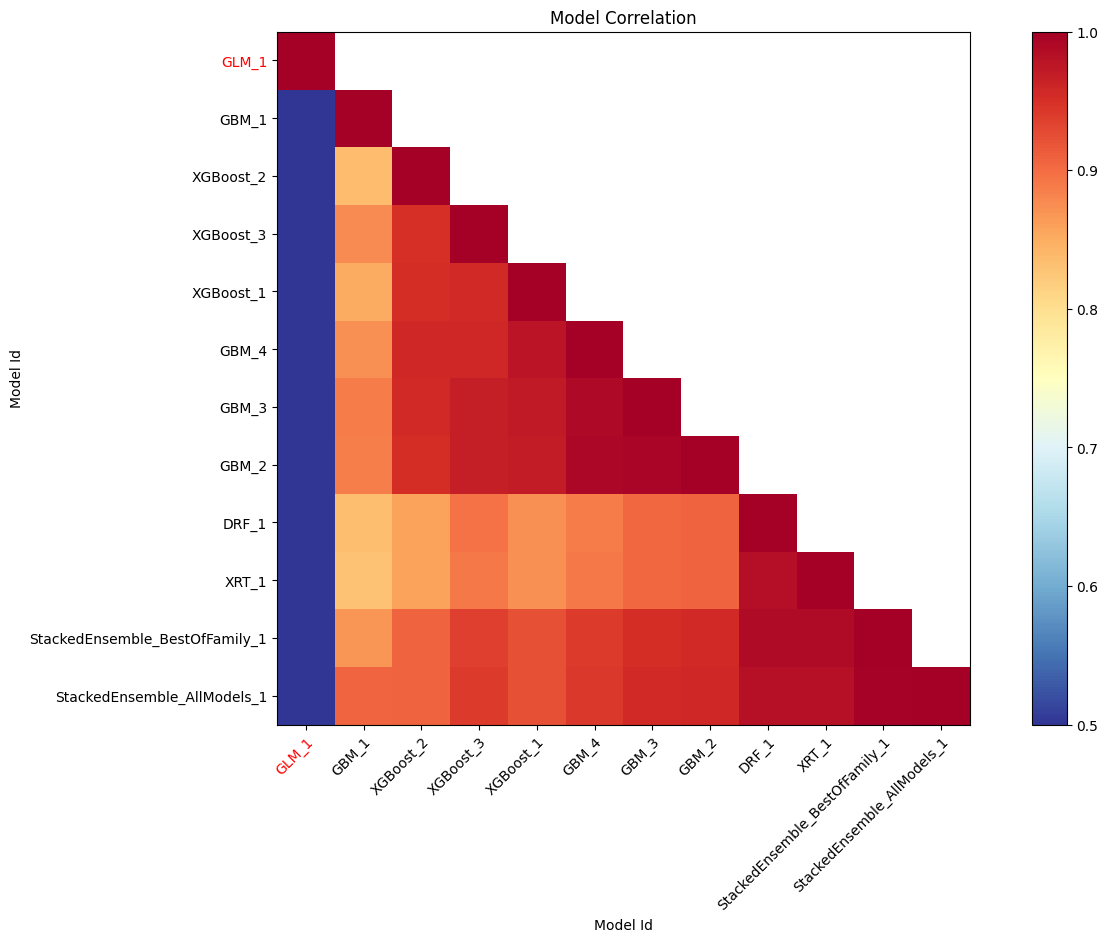

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

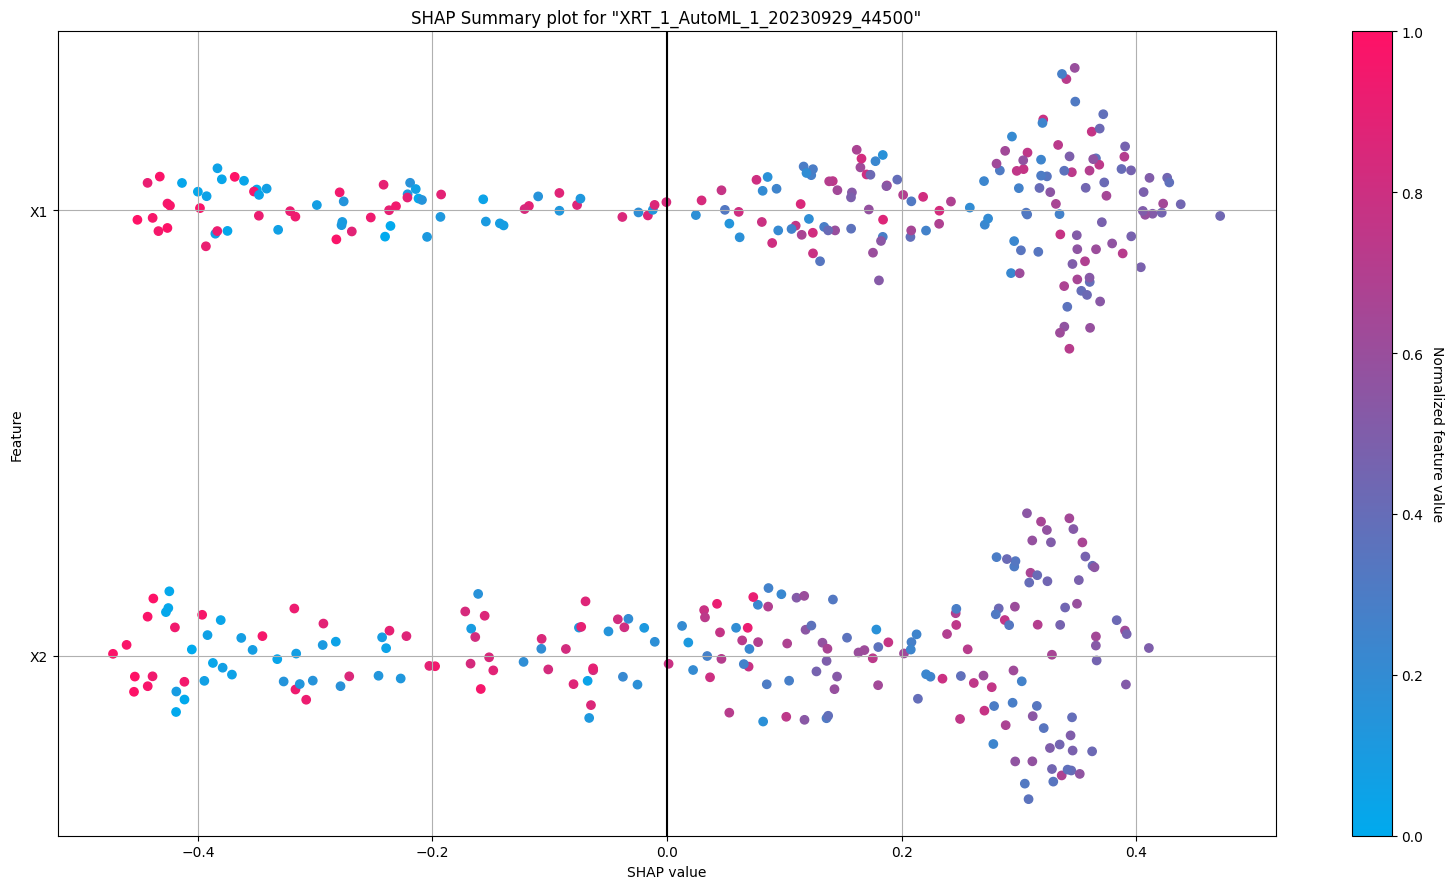

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

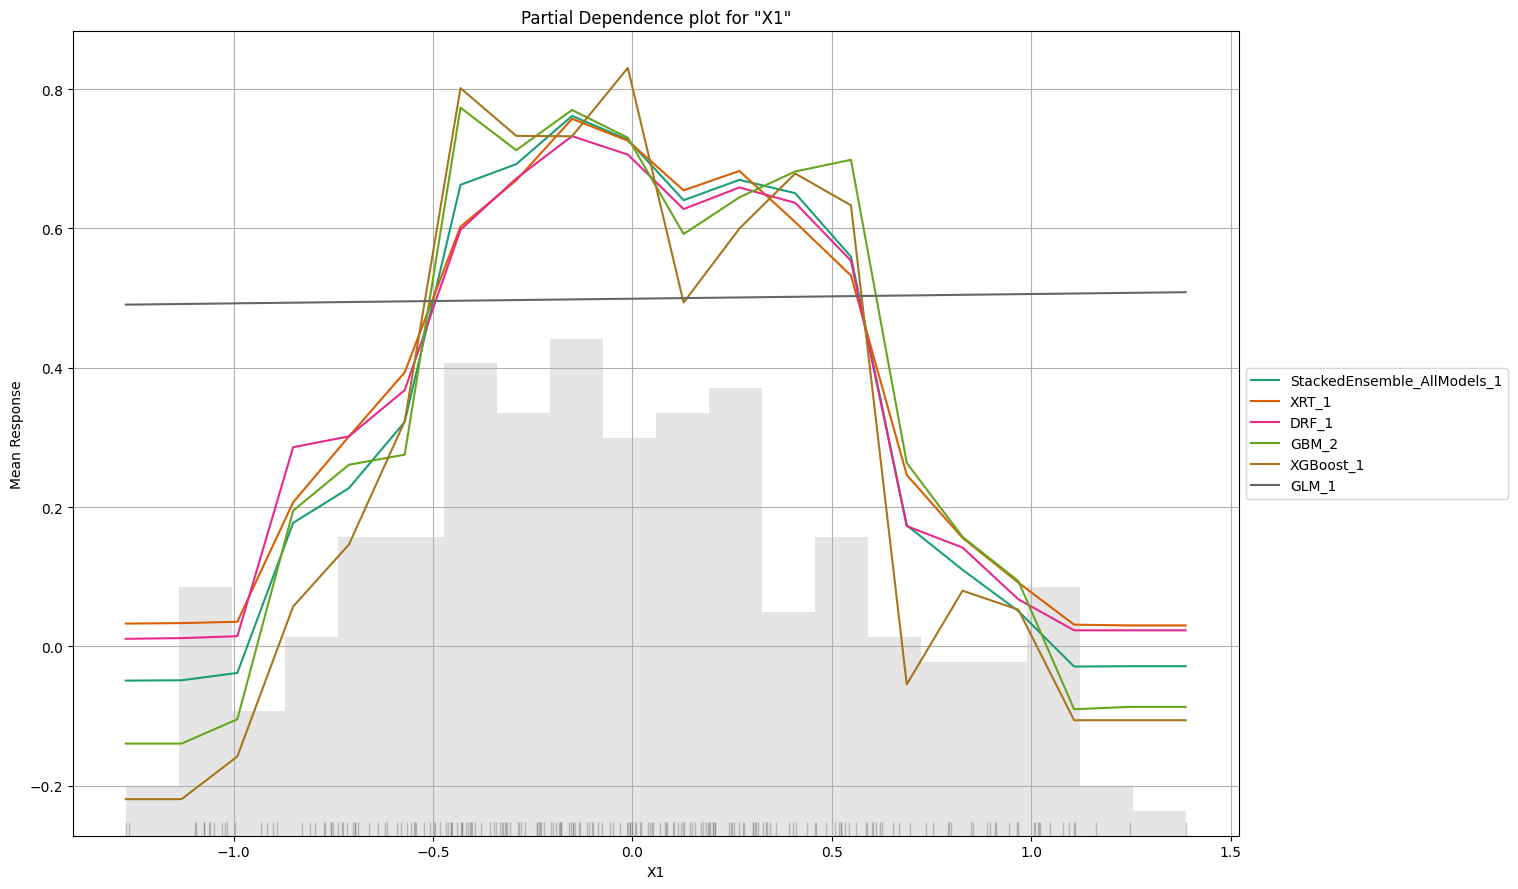

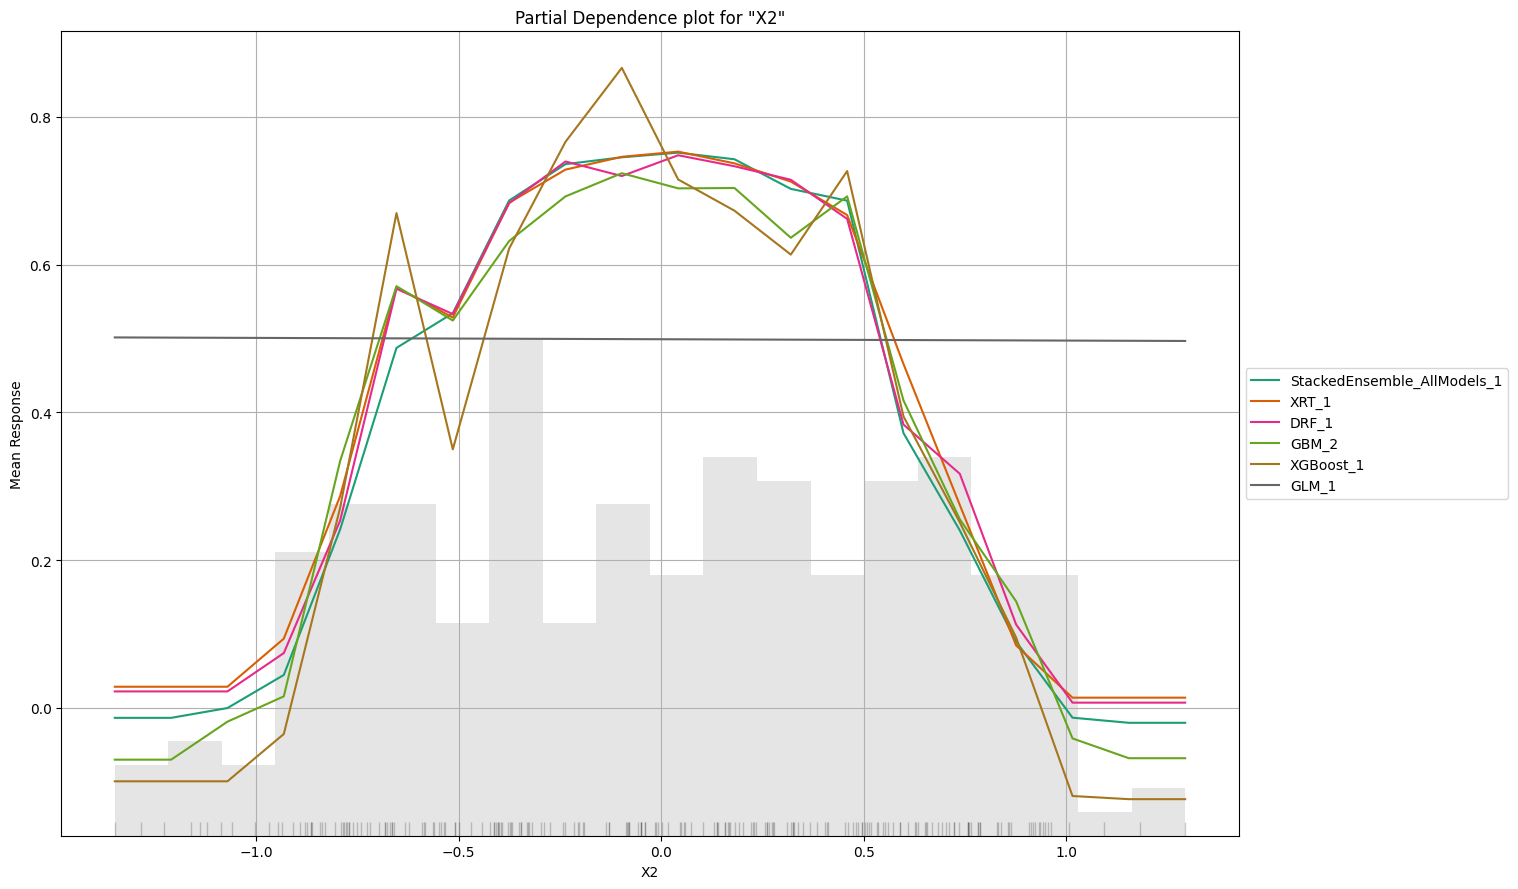

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

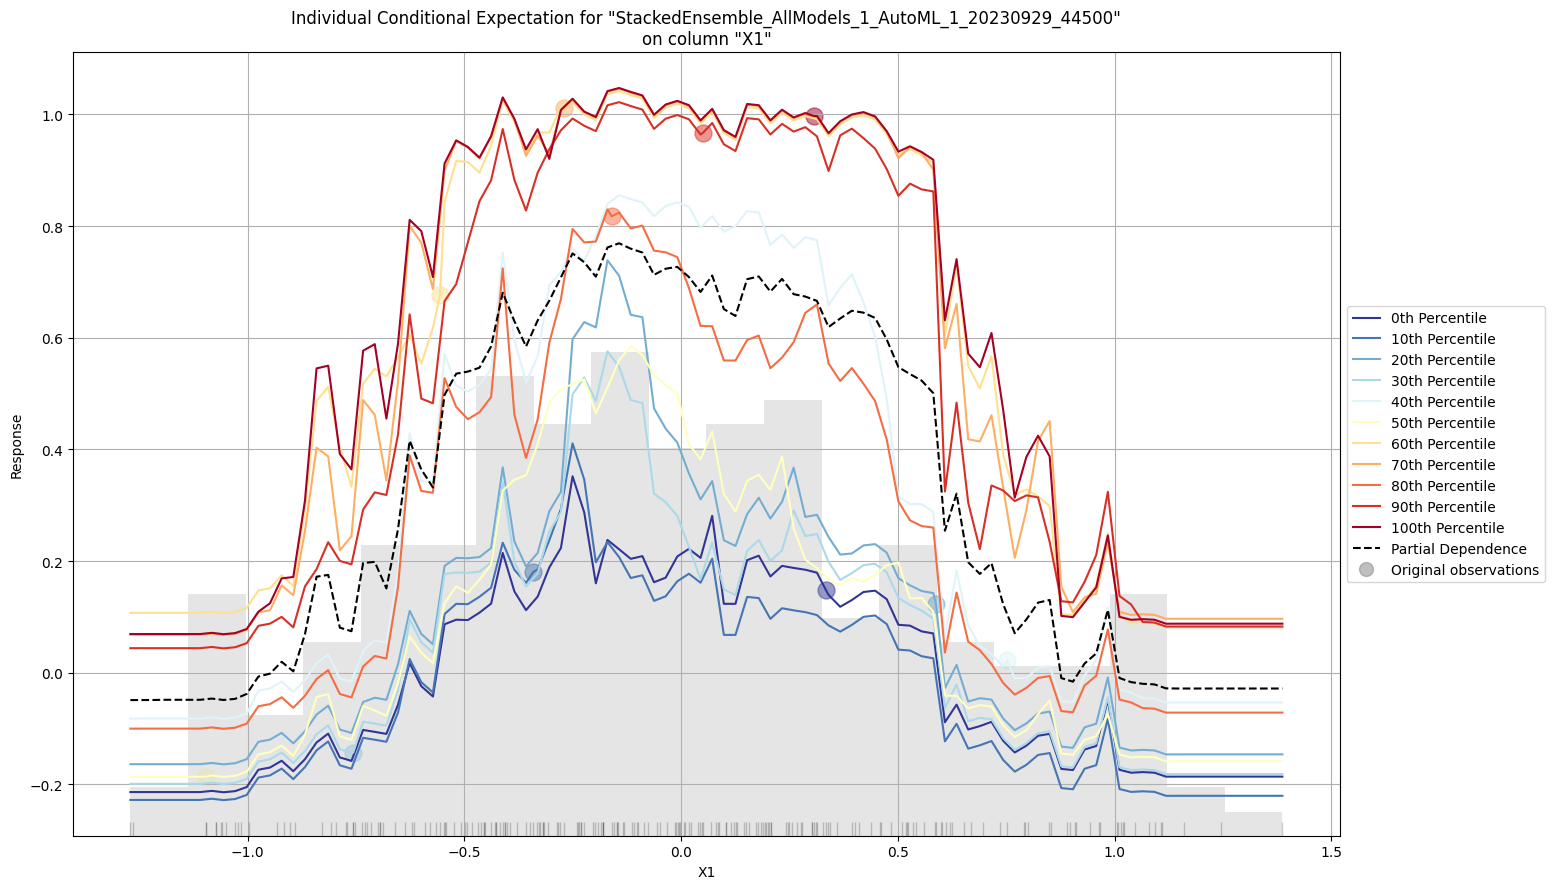

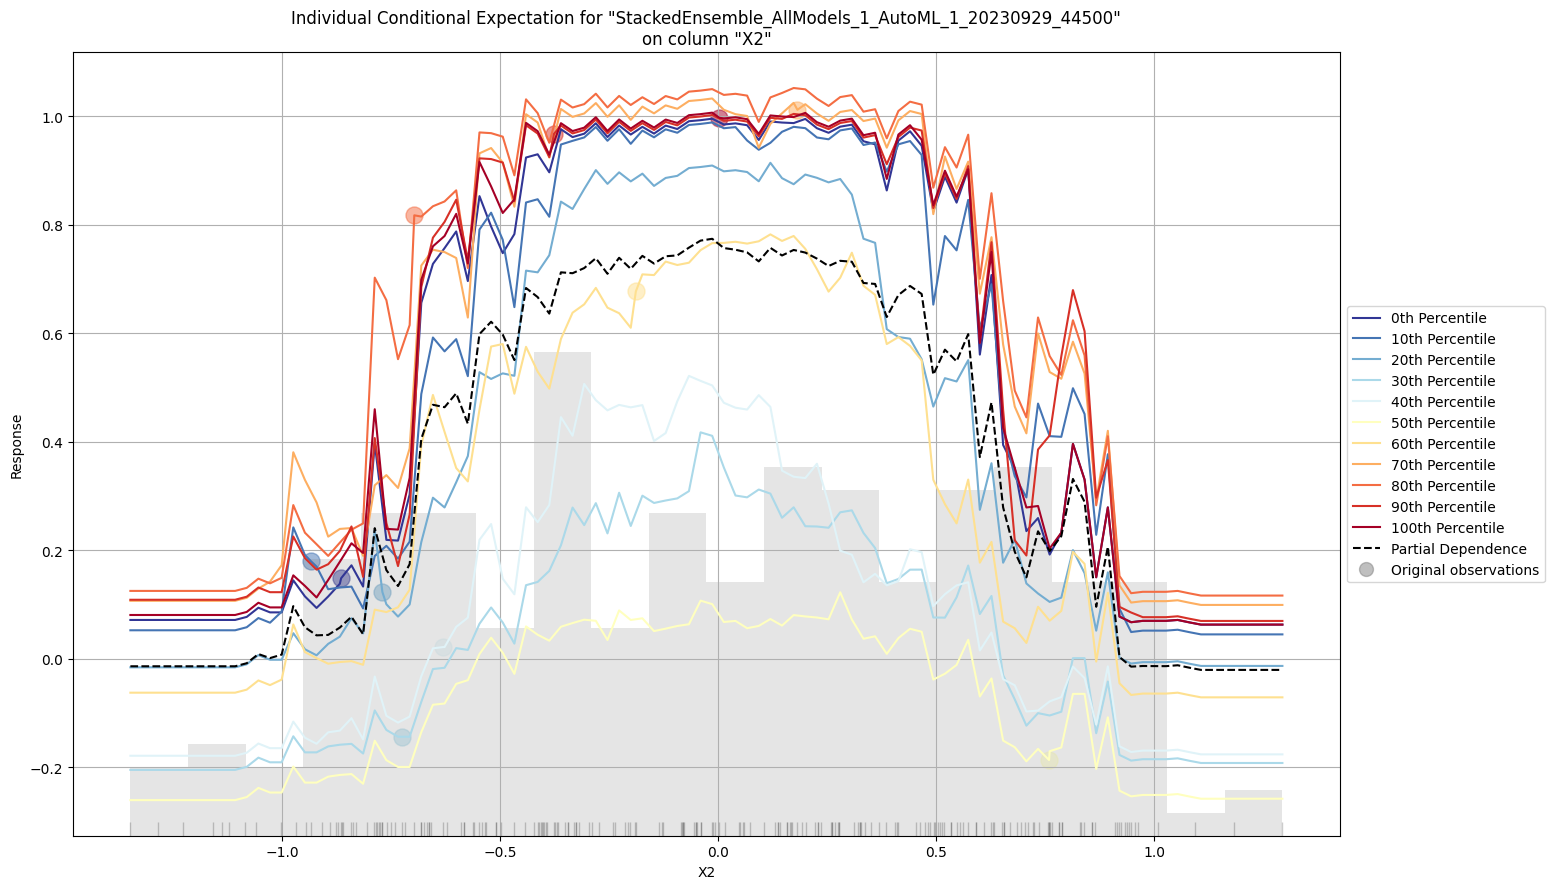

In [9]:
automl_explainer = h2o_automl.explain(test_df)